<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task #2.1 Median value of owner-occupied homes
For the "Median value of owner-occupied homes" provide a boxplot

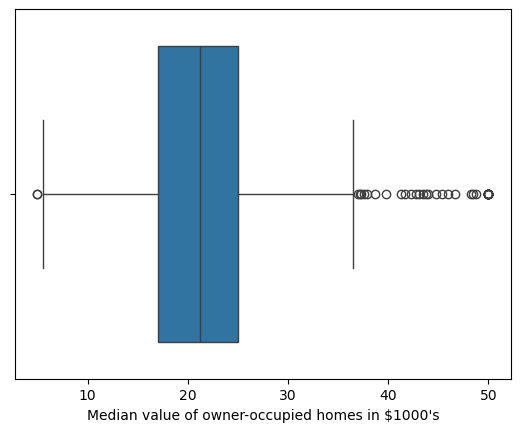

In [35]:
mv = sns.boxplot(x="MEDV", data=boston_df,)
mv.set(xlabel='Median value of owner-occupied homes in $1000\'s')
pyplot.show()

**Conclusion:** The most homes median value is between ~15 and ~25. 

## Task #2.2 bar plot for the Charles river variable
Provide a  bar plot for the Charles river variable

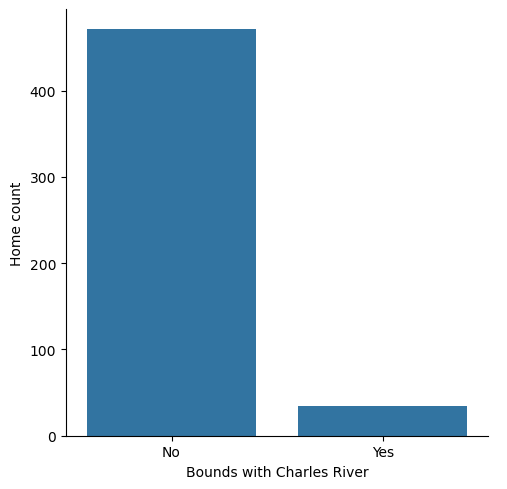

In [56]:
cr = sns.catplot(data=boston_df, x="CHAS", kind='count')
cr.set(xlabel='Bounds with Charles River', ylabel='Home count')
cr.set_xticklabels(["No", "Yes"])
pyplot.show()

**Conclusion:** There much more homes that don't bound Charles River

## Task #2.3 MEDV variable vs the AGE variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

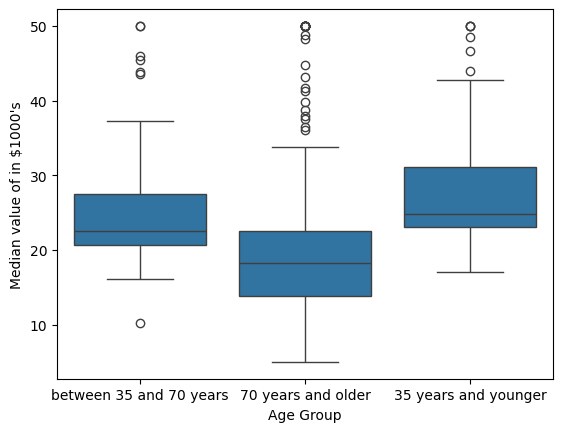

In [44]:
# split data into 3 groups
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
 

medv_age = sns.boxplot(data=boston_df, y="MEDV", x='age_group')
medv_age.set(ylabel='Median value of in $1000\'s', xlabel='Age Group')
pyplot.show()

**Conclusion:** The group of 35 and younger have highest median value  whereas the group of 70 and older have lowest median value 
The group between 35 and 70 yeards have medium median value 

## Task #2.4 show the relationship between Nitric oxide concentrations
Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


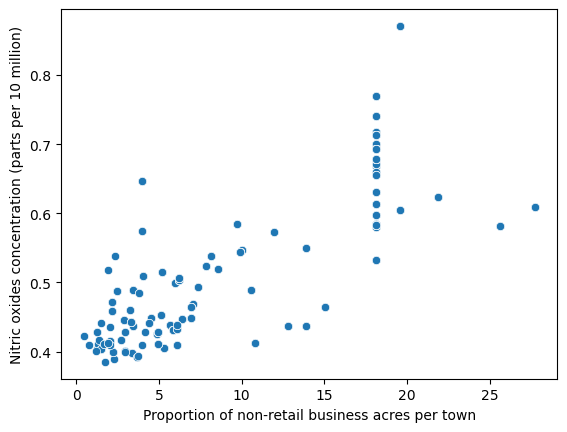

In [49]:
nox_indus = sns.scatterplot(data=boston_df, y="NOX", x='INDUS')
nox_indus.set(ylabel='Nitric oxides concentration (parts per 10 million)', xlabel='Proportion of non-retail business acres per town')
pyplot.show()

**Conclusion:** The nitric oxides concetration gets higher with more non-retail businessses acres per town

## Task #2.5 histogram for the pupil to teacher ratio variable
Create a histogram for the pupil to teacher ratio variable

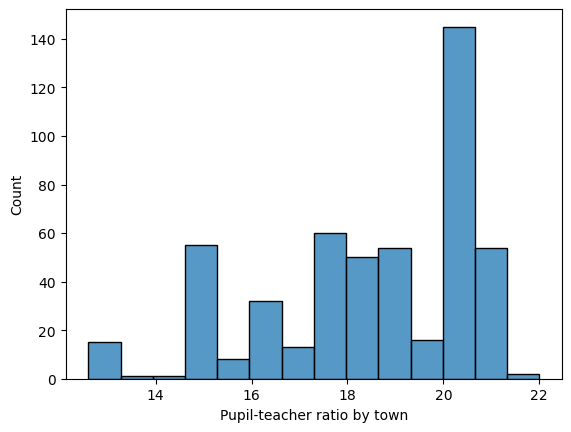

In [51]:
pt = sns.histplot(data=boston_df, x="PTRATIO")
pt.set(xlabel='Pupil-teacher ratio by town')
pyplot.show()

**Conclusion:** The awerage frequency of pupil-teacher ratio is around 18-20

## Task #3 Question 1
Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river")
*   $a = 0.05$

#### We need to check that populations have identical variances
Lets plot distribution

<ipython-input-60-7afa4437bf8f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['MEDV'],


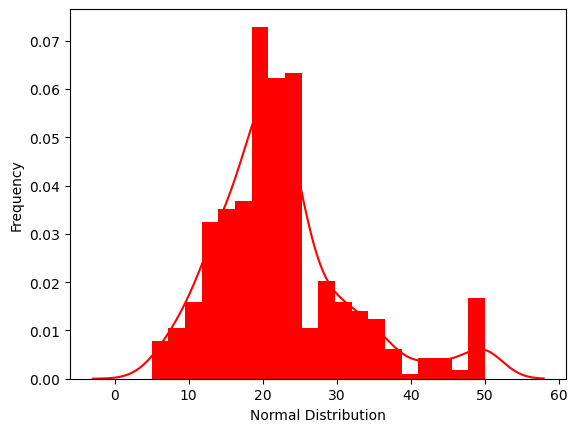

In [60]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
pyplot.show()

**Conclusion:** The distribution doesn't look to be normal. We can use the Levene's Test  to check test significance

In [71]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

# since the p-value 0.03 is less than 0.05 we can assume that variance is not equal

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [69]:
# equal_var = False because variance is not equal
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                    boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river

## Task #3 Question 2
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Because ANOVA can't work with continuous variable we used 3 categories created previosly:
- 35 years and younger
- between 35 and 70 years
- 70 years and older

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ
*   $a = 0.05$

Test for equality of variance

In [76]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

# since the p-value (0.0629) is more than 0.05, we can assume that variance is equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [75]:
# separate the three samples

thirtyfive= boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventyn_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

#  Run ANOVA

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive, thirtyfive_seventy, seventyn_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

## Task #3 Question 3
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis

*   $H\_0:$ There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
*   $H\_1:$ There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
*   $a = 0.05$


In [77]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])


PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:**   Since the p-value (2-tailed) is less than 0.05, we will reject the null hypothesis as there is significant evidence that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

## Task #3 Question 4
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes")
*   $a = 0.05$

In [79]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        22:32:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that there is a impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.